# House Price Prediction with Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from pathlib import Path

In [4]:
# path where dataset is allocate
dataset_path = Path('Dataset')
# loading the data in the path
data = pd.read_csv(dataset_path / 'housing.csv')

In [5]:
# data shape
data.shape

(20640, 10)

In [6]:
# visualize the features
data.columns.tolist()

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [7]:
# target variable that we want to predict is median_house_value
# the other features are the inpute features that we will use to predict the our target variable

In [8]:
# we cant use the feature ocean_proximity directly because it has some keyword that our model cant understand  right away
data["ocean_proximity"].unique().tolist()

['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']

# Exploring our dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
# asa we see all features has 20640 values except the featur "total_bedrooms" has "20433"
# sice there few values missing we can drop them otherwise we can try istimate the value should be there
# deleting the null values by returning dataset with only non-null value and save it in our data objet
data.dropna(inplace=True)

In [11]:
# seeing the results in our data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [12]:
# splitting the data into training and testing data
from sklearn.model_selection import train_test_split
# the features we will use to train our model in
X = data.drop(['median_house_value'], axis=1) # axis=1 to drop the COLUMN
# the feature we want to predict
y = data['median_house_value']

In [13]:
# the splittingg 80% for training 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [17]:
# joining the X_train and y_train se we can explore correlations
train_data = X_train.join(y_train)

In [18]:
train_data.shape

(16346, 10)

In [19]:
train_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12441    -116.19     33.69                11.0       5692.0          1346.0   
959      -121.93     37.70                 3.0       2456.0           582.0   
18117    -122.02     37.32                27.0       4336.0           754.0   
7087     -118.01     33.93                34.0       2424.0           468.0   
13852    -117.28     34.51                10.0       4676.0           884.0   

       population  households  median_income ocean_proximity  \
12441      5682.0      1273.0         2.5383          INLAND   
959         793.0       456.0         4.4087       <1H OCEAN   
18117      2009.0       734.0         6.3923       <1H OCEAN   
7087       1293.0       444.0         3.2750       <1H OCEAN   
13852      2845.0       812.0         3.0181          INLAND   

       median_house_value  
12441             74000.0  
959              225600.0  
18117            348300.0  
7087             189900.0  
13852            100400.0

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

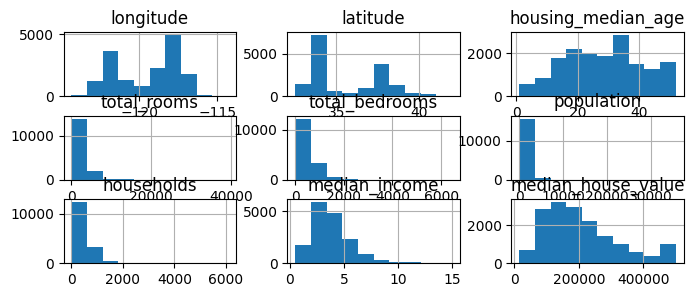

In [20]:
# histograms for the distributions of the individual features
train_data.hist(figsize=(8,3))

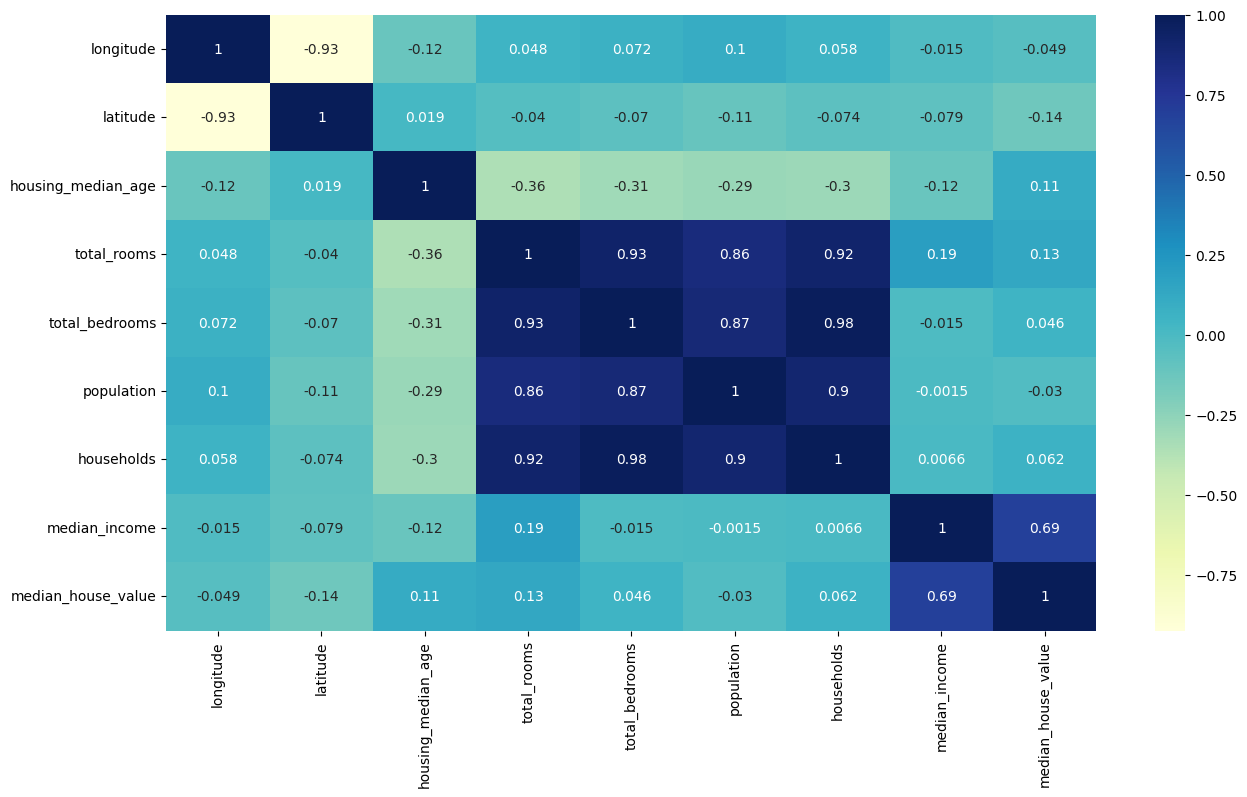

In [26]:
# visualize a correlation matrix with the target variable
# dropping the "ocean_proximity" because its not numerical
data_without_OP = train_data.drop(['ocean_proximity'], axis=1)
plt.figure(figsize=(15, 8))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(data_without_OP.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [27]:
# in the heatmap of correlation we can see that the feature median_income is highly correlated with our target "medin_house_value"

# Pre-Processing

In [41]:
# in the histograms we can see that the features are skewed
# so we use the the log transformation + 1 to prevent zero valuees
#train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
#train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
#train_data['population'] = np.log(train_data['population'] + 1)
#train_data['households'] = np.log(train_data['households'] + 1)
#Pre-Processing the ocean_proximity before applying the log
train_data['ocean_proximity'].unique().tolist()

['INLAND', '<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND']